In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

matplotlib.style.use("ggplot")
from ipywidgets import interact
import numpy as np
import matplotlib as mpl
import arrow
from matplotlib import animation, rc
from IPython.display import HTML
from datetime import timedelta


%matplotlib inline

In [20]:
#############################################################################
# Prepare data and import into a dataframe
#############################################################################


# Export Data from healthkit using [qs-access](https://itunes.apple.com/us/app/qs-access/id920297614?mt=8) app
exported_and_trandformed_csv_file = "data/sleep.csv"
df = pd.read_csv(exported_and_trandformed_csv_file)


def toDecimal(dt):
    return dt.hour + round(dt.minute / 60, 2)


# make dateColumn a datetime.
df["bedtime"] = pd.to_datetime(df["In bed at"])
df["waketime"] = pd.to_datetime(df["Until"])
df["dbedtime"] = df.bedtime.apply(toDecimal)
df["dwaketime"] = df.waketime.apply(toDecimal)
df["dasleep"] = pd.to_datetime(df.Asleep).apply(toDecimal)
# df["dquality"] = pd.to_datetime(df["Quality sleep"]).apply(toDecimal)
# df["ddeep"] = pd.to_datetime(df["Deep sleep"]).apply(toDecimal)
df["dduration"] = pd.to_datetime(df["Duration"]).apply(toDecimal)
df.drop("Until", inplace=True, axis=1)
df.drop("In bed at", inplace=True, axis=1)
idx_date = "idate"

# https://stackoverflow.com/questions/16176996/keep-only-date-part-when-using-pandas-to-datetime
df[idx_date] = pd.to_datetime(df.waketime).dt.normalize()

df = df.set_index(df[idx_date])
df.sort_index(inplace=True)
# Create Time Period Groups
idx_month_year = "month_year"
df[idx_month_year] = df.index.to_series().apply(lambda t: arrow.get(t).format("MMM-YY"))

idx_week_year = "week_year"
df[idx_week_year] = df.index.to_series().apply(lambda t: f"{t.week}-{t.year-2000}")

#########################
# Clean data
###########################

# Remove 0 weight values.
df = df.replace(0, np.nan)
# Throw away junk data at the start of time
df = df["2010/1/1":]  # type: ignore

# Throw away any weights less then 100
# Remove any rows with 0 values

cNoHeartRate = df[df.Heartrate == "--"].Duration.count()
print(f"Dropping {cNoHeartRate} w/o heart rate and other rich data ")
df = df[df.Heartrate != "--"]
df.Heartrate = pd.to_numeric(df.Heartrate)

# Helpful time aliases
df_alltime = df
df

Dropping 24 w/o heart rate and other rich data 


,Duration,Asleep,Time awake in bed,Fell asleep in,Quality sleep,Deep sleep,Heartrate,Tags,Notes,bedtime,waketime,dbedtime,dwaketime,dasleep,dduration,idate,month_year,week_year
idate,,,,,,,,,,,,,,,,,,
2018-09-03,7:39,7:14,25,--,5:21,2:29,57,--,--,2018-09-02 21:50:00,2018-09-03 05:29:00,21.83,5.48,7.23,7.65,2018-09-03,Sep-18,36-18
2018-09-09,6:49,6:09,40,--,4:19,1:28,54,--,--,2018-09-08 21:54:00,2018-09-09 04:43:00,21.90,4.72,6.15,6.82,2018-09-09,Sep-18,36-18
2018-09-10,7:28,6:42,46,12,5:26,1:29,55,--,--,2018-09-09 21:32:41,2018-09-10 05:01:00,21.53,5.02,6.70,7.47,2018-09-10,Sep-18,37-18
2018-09-11,7:57,7:37,20,--,5:21,1:46,62,--,--,2018-09-10 21:41:00,2018-09-11 05:38:00,21.68,5.63,7.62,7.95,2018-09-11,Sep-18,37-18
2018-09-12,8:26,7:40,46,--,5:12,43,55,--,--,2018-09-11 21:02:00,2018-09-12 05:28:00,21.03,5.47,7.67,8.43,2018-09-12,Sep-18,37-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-19,9:49,9:23,26,--,6:03,1:16,59,--,--,2020-11-18 20:00:00,2020-11-19 04:51:00,20.00,4.85,9.38,9.82,2020-11-19,Nov-20,47-20
2020-11-20,6:36,6:36,0,--,4:46,45,59,--,--,2020-11-19 21:16:00,2020-11-20 03:52:00,21.27,3.87,6.60,6.60,2020-11-20,Nov-20,47-20
2020-11-21,10:53,9:22,1:31,--,6:23,1:36,61,--,--,2020-11-20 18:31:00,2020-11-21 05:24:00,18.52,5.40,9.37,10.88,2020-11-21,Nov-20,47-20


In [21]:
def box_plot_weight_over_time(df, x, fact, title):
    # In theory can use plot.ly (not free)  or Bokeh (not mpl compatible) but issues. So setting dimensions old school.
    # Manually setting the weight and width.
    height_in_inches = 8
    mpl.rc("figure", figsize=(2 * height_in_inches, height_in_inches))

    ax = sns.boxplot(x=x, y=fact, data=df)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.set_title(title)
    ax.set_xlabel("date")
    ax.set_ylabel(fact)
    # ax.set_ylim(4,8)
    plt.show()

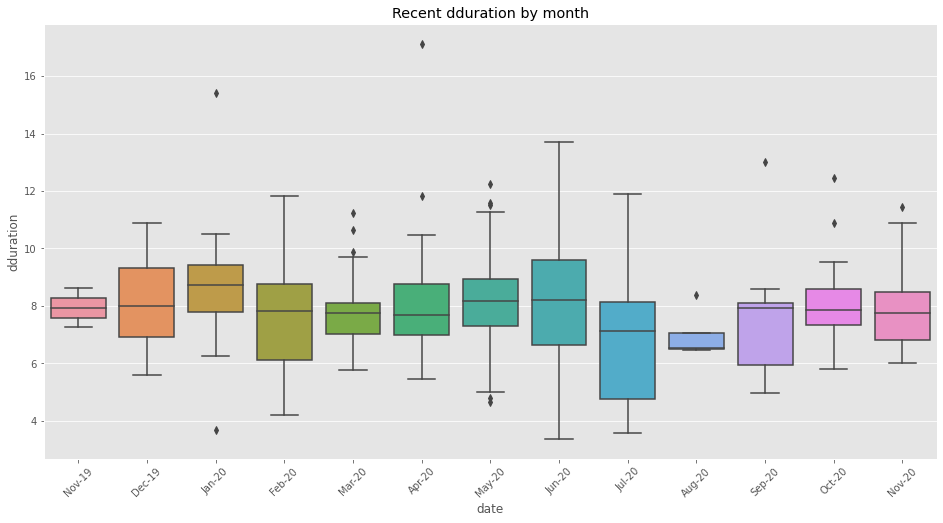

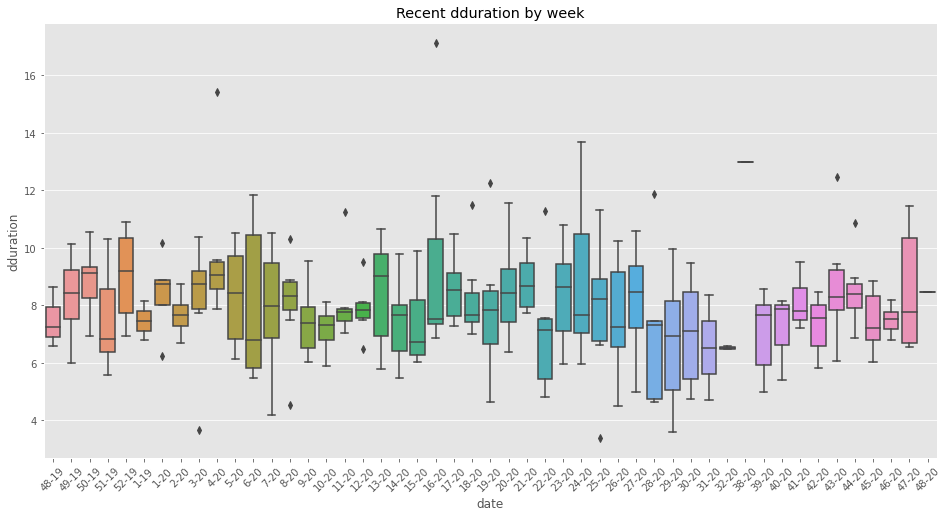

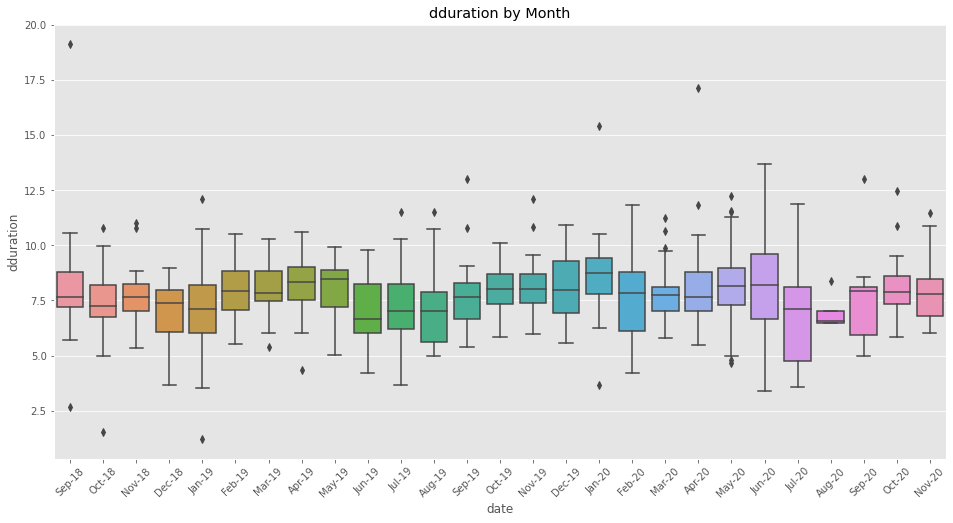

In [23]:
earliest = arrow.utcnow().shift(months=-12).date()
fact = "dduration"
# fact = "Heartrate"
# fact = "dwaketime"
# fact = "dbedtime"
box_plot_weight_over_time(
    df[earliest:], idx_month_year, fact, title=f"Recent {fact} by month"
)
box_plot_weight_over_time(
    df[earliest:], idx_week_year, fact, title=f"Recent {fact} by week"
)
box_plot_weight_over_time(df_alltime, idx_month_year, fact, f"{fact} by Month")

# Time Series Analysis using resampling

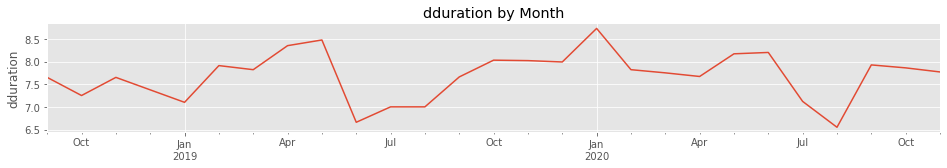

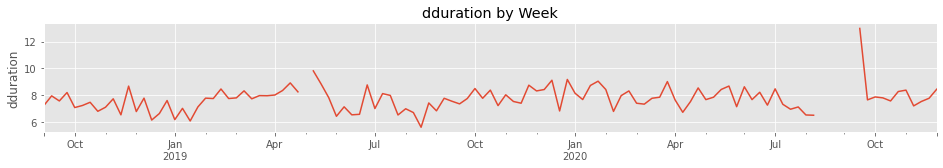

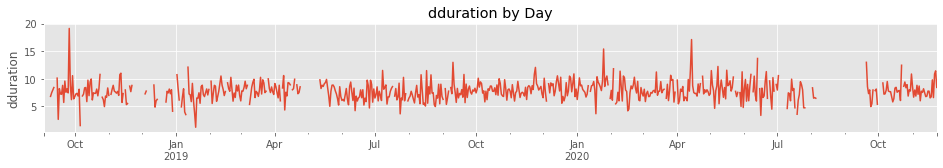

In [24]:
fact = "dduration"
dfW = df[fact]
for freq in "Month Week Day".split():
    pandasFreqValue = freq[0]  # hack, pandas Freq are D,W,M
    ax = (
        dfW.resample(pandasFreqValue)
        .median()
        .plot(title=f"{fact} by {freq}", figsize=(16, 2))
    )
    ax.set_ylabel(fact)
    ax.set_xlabel("")
    plt.show()
# Can graph interactively using Bokeh @
# https://stackoverflow.com/questions/45972782/plot-time-series-graph-using-bokeh

In [ ]:
dfM = dfW.resample("W").median()

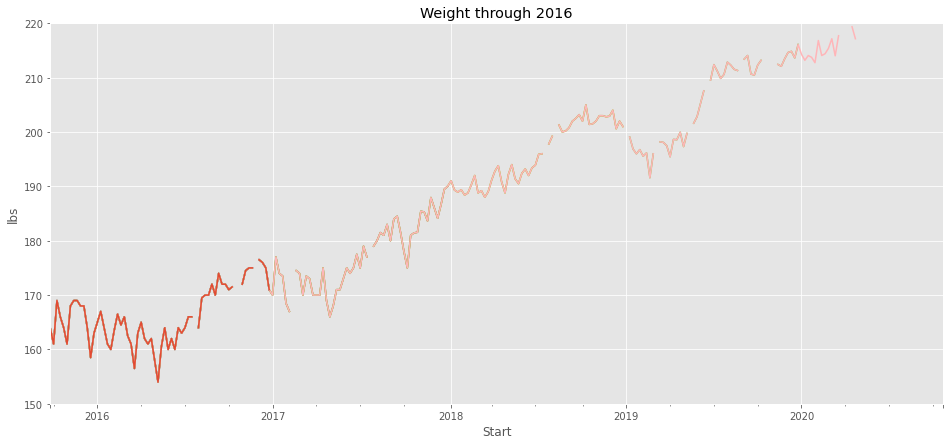

In [34]:
anim_year_base = 2016
anim_fig_size = (16, 7)
fig = plt.figure(figsize=anim_fig_size)
ax = fig.add_subplot(1, 1, 1)
dfM[:f"{anim_year_base}"].plot(
    title=f"Title Over Written", figsize=anim_fig_size, ylim=(150, 220), ax=ax
)
ax.set_ylabel("lbs")
ax.set_xlabel("")


def animate(i):
    year = f"{anim_year_base+i}"
    return dfM[:year].plot(title=f"Weight through {year}").lines


years_to_plot = 5
anim = animation.FuncAnimation(
    fig,
    animate,
    frames=years_to_plot,
    interval=timedelta(seconds=2).seconds * 1000,
    blit=False,
)
HTML(anim.to_html5_video())
# TODO - how to get rid of the initial plot from animate.init() -- no clue.